## Feature Selection Assigment


---

By 
  - Rakibuzzaman Mahmud
  - Mithun Das
  - Muhtasim Fuad Ansari




In [2]:
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [3]:
df_combined = pd.read_csv('processed_data.csv',parse_dates=['time'],index_col='time',)


In [4]:
# Selecting value from 2015 to get the data where every station has their own data.


df_combined = df_combined[(df_combined.index.year >= 2014) & (df_combined.index.year <= 2017)]

Since We have to predict the main station values then we can separate the 2 values in 2 variables.

In [17]:
df_combined.shape

(35064, 11)

In [5]:
# level_cm_and_flow_m2_s = df_combined.iloc[:, [9,10]]


level_cm = df_combined.iloc[:,0:-2]
flow_m2_s = df_combined.iloc[:,10]

# level_cm
flow_m2_s

# level_cm.shape

time
2014-01-01 00:00:00    0.089526
2014-01-01 01:00:00    0.089526
2014-01-01 02:00:00    0.089526
2014-01-01 03:00:00    0.089526
2014-01-01 04:00:00    0.089526
                         ...   
2017-12-31 19:00:00    3.782377
2017-12-31 20:00:00    3.994366
2017-12-31 21:00:00    4.206355
2017-12-31 22:00:00    4.460742
2017-12-31 23:00:00    4.672731
Name: f0_m2_s, Length: 35064, dtype: float64

In [6]:
feature_df = df_combined.iloc[:, 0:-2]

## Applying the PCA on the data.

In [13]:
# plt.style.use('ggplot')

### PCA with All the components to figure out the highest values. 

In [8]:
pca = PCA(n_components=None)
pc = pca.fit_transform(feature_df)



In [9]:
# pca.explained_variance_ratio_ * 100
pca.explained_variance_ratio_ 
 
 

array([5.21654985e-01, 2.39546489e-01, 1.64760676e-01, 4.58579241e-02,
       2.70015983e-02, 7.32952024e-04, 3.39115486e-04, 8.48535972e-05,
       2.14062315e-05])

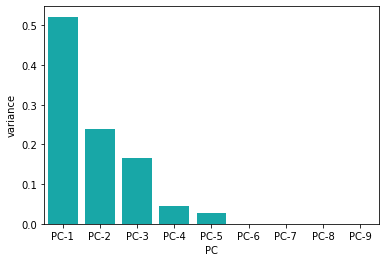

In [10]:
#components = pd.DataFrame(pca.components_,columns=feature_df.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
#components

df = pd.DataFrame({'variance':pca.explained_variance_ratio_,'PC':['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9']})

sb.barplot(x='PC',y='variance',data=df, color='c')

In [ ]:
print("varience explained by 9 principal component = ", np.cumsum(sum(pca.explained_variance_ratio_)*100))

In [ ]:
pca.explained_variance_ratio_ * 100

### Applying PCA with the first 3 Highest value. 

In [13]:
pca = PCA(n_components=9)
pc = pca.fit_transform(feature_df)


pca.explained_variance_ratio_


array([5.21654985e-01, 2.39546489e-01, 1.64760676e-01, 4.58579241e-02,
       2.70015983e-02, 7.32952024e-04, 3.39115486e-04, 8.48535972e-05,
       2.14062315e-05])

In [22]:
newComponents = pd.DataFrame(pc,columns= ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])

newComponents['water_level'] = df_combined['level_cm'].to_numpy()
newComponents.to_csv("pca_data.csv")


In [ ]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of component')
# plt.ylabel('Explained variance')

In [30]:

df = pd.DataFrame({'variance':pca.explained_variance_ratio_,'PC':['PC-1','PC-2','PC-3']})

sb.barplot(x='PC',y='variance',data=df, color='c')

ValueError: arrays must all be same length

In [ ]:
print("PC-1 Value = ",int(np.cumsum(pca.explained_variance_ratio_*100)[0]),'%')
print("PC-2 Value = ",int(np.cumsum(pca.explained_variance_ratio_*100)[1]),'%')
print("PC-3 Value = ",int(np.cumsum(pca.explained_variance_ratio_*100)[2]),'%')
# print("PC-4 Value = ",int(np.cumsum(pca.explained_variance_ratio_*100)[3]),'%')
# print("PC-5 Value = ",int(np.cumsum(pca.explained_variance_ratio_*100)[4]),'%')

In [ ]:
pca = PCA(n_components=.9)
pc = pca.fit_transform(feature_df)
pc

In [ ]:
plt.figure(figsize=(10,7))
sb.scatterplot(pc[:, 0],pc[:, 1],s=40,
                hue= df_combined.level_cm)

plt.title("2D Scatterplot:", pad = 20)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(pc[:, 0],pc[:, 1],pc[:,2],s=40,
                c= df_combined.level_cm , alpha = 0.9)
plt.title("3D Ploting: ")
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

From the variance ratio we see that the first 5 principle components can explain the 95% information about the feature space and by doing so we are reducing the data by 45%. We are taking 5 features from 9 available ones.

In [ ]:
pca.components_

In [ ]:
# components = pd.DataFrame(pca.components_,columns=feature_df.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
# components

In [ ]:
newComponents.to_csv("pca_data.csv")